In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [38]:
data_display = pd.read_csv("dataset3_pd.csv")

print(data_display)

     WL1(mm)  WL2(mm)  WL3(mm)  WL4 (mm)  WL5 (mm)  Solar (W/m2)  \
0         53      208       87        36        44             0   
1         59       62       93        36        50           113   
2         60       61       93        36        56           152   
3         58       60       91        36        51           141   
4         57       61       91        36        48           123   
..       ...      ...      ...       ...       ...           ...   
408       39       42       42        36        44             0   
409       39       42       42        36        44             0   
410       39       42       42        36        44             0   
411       39       42       42        36        44             0   
412       39       42       42        36        44            12   

     AirTemp (DegC)  RH (%)    y  
0              21.9      97 -0.1  
1              22.3     100 -0.1  
2              22.8     100 -0.1  
3              23.3     100 -0.1  
4       

In [47]:
learning_rate = 0.01
trainning_steps = 30000
display_step = 1000

w_pred = 0

In [48]:
data = np.loadtxt("dataset3_np.csv", delimiter = ',', dtype = np.float32)

x_train = data[:300, :8]
x_test = data[300:, :8]

y_train = data[:300, [-1]]
y_test = data[300:, [-1]]

w = tf.Variable(tf.random.uniform([8, 1], 0, 1))
bias = tf.Variable(random.random())

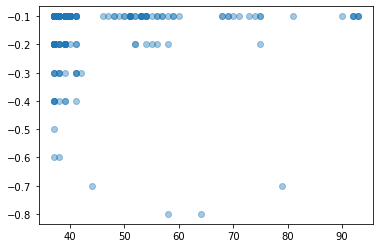

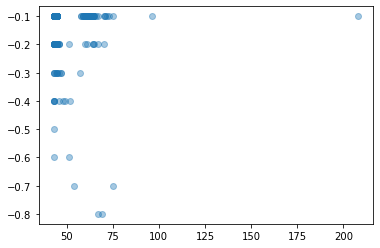

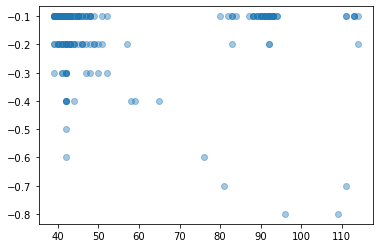

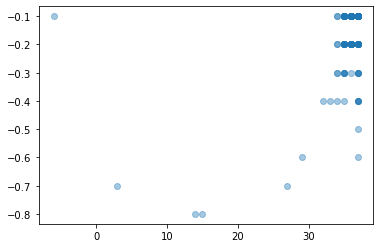

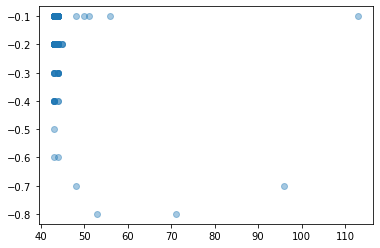

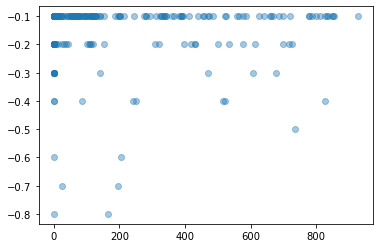

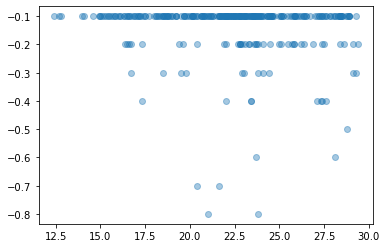

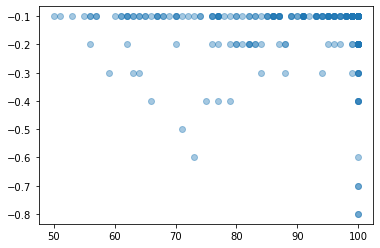

In [49]:
for i in range(8):
    plt.scatter(x_train[:, [i]], y_train, alpha=0.4)
    plt.show()

In [50]:
def compute_loss():
    hypothesis = tf.matmul(x_train, w) + bias
    loss = tf.reduce_mean((hypothesis - y_train) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = learning_rate)

for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w, bias])
    
    if step % display_step == 0:
        print('step:', step, '\n', 'w:', '\n', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')
        
        w_pred = w.numpy()

step: 1000 
 w: 
 [[ 0.16686615]
 [ 0.35903564]
 [-0.23308751]
 [-0.21523458]
 [-0.482625  ]
 [ 0.00810938]
 [-0.10468149]
 [ 0.19363748]] 
 bias: -0.40954643 
 loss: 21.357382 

step: 2000 
 w: 
 [[ 0.08778363]
 [ 0.21611486]
 [-0.09780408]
 [-0.20040113]
 [-0.39147028]
 [ 0.00594636]
 [ 0.01359485]
 [ 0.15461273]] 
 bias: -0.36621776 
 loss: 7.655323 

step: 3000 
 w: 
 [[ 0.05502177]
 [ 0.08757446]
 [-0.03768432]
 [-0.16618705]
 [-0.26565903]
 [ 0.00311233]
 [ 0.11772686]
 [ 0.10941918]] 
 bias: -0.30059665 
 loss: 2.2308974 

step: 4000 
 w: 
 [[ 0.03678147]
 [ 0.02889936]
 [-0.01428324]
 [-0.12525368]
 [-0.15269442]
 [ 0.00093119]
 [ 0.15026923]
 [ 0.06069011]] 
 bias: -0.24011008 
 loss: 0.6474315 

step: 5000 
 w: 
 [[ 2.0759165e-02]
 [ 1.1667578e-02]
 [-7.3212329e-03]
 [-7.4258327e-02]
 [-7.6683581e-02]
 [ 4.5429559e-05]
 [ 1.1004229e-01]
 [ 2.7692864e-02]] 
 bias: -0.19196288 
 loss: 0.20014095 

step: 6000 
 w: 
 [[ 8.7026414e-03]
 [ 4.9723196e-03]
 [-3.4115263e-03]
 [-2.7085

In [51]:
y_hat = tf.matmul(x_test, w_pred) + bias

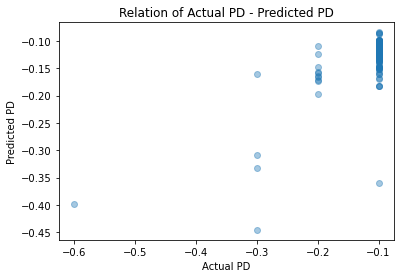

In [52]:
plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [53]:
def rmse(x_test, y_test):
    y_hat = tf.matmul(x_test, w_pred) + bias
    error = y_hat - y_test
    mse = np.mean(error * error)
    rmse = np.sqrt(mse)
    
    return rmse

print(rmse(x_test, y_test))

0.048989385
